In [46]:
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time
import os
import random
import shutil
import glob

In [47]:
os.chdir("C:/SiddheshBangar/ML/ML MINI/Endangered Animal")
f = open("Endangered Animal.txt", "r")
names = np.loadtxt(f,dtype='str')

In [48]:
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'

# loading up our datasets
train_data_dir = "Data\Train"
validation_data_dir = "Data\Valid"
test_data_dir = "Data\Test"

epochs = 27
batch_size = 50

In [49]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

In [50]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [51]:
#__this can take an hour and half to run so only run it once.
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()

generator = datagen.flow_from_directory(
     train_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode=None,
     shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 4770 images belonging to 15 classes.


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_20880\3600683396.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


Time:  0:08:20.679143


In [52]:
start = datetime.datetime.now()
generator = datagen.flow_from_directory(
     validation_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode=None,
     shuffle=False)

nb_validation_samples = len(generator.filenames)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = vgg16.predict_generator(
     generator, predict_size_validation)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1494 images belonging to 15 classes.


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_20880\450183140.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(


Time:  0:02:29.236956


In [53]:
start = datetime.datetime.now()
generator = datagen.flow_from_directory(
     test_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode=None,
     shuffle=False)

nb_test_samples = len(generator.filenames)

predict_size_test = int(math.ceil(nb_test_samples / batch_size))

bottleneck_features_test = vgg16.predict_generator(
     generator, predict_size_test)

np.save('bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1028 images belonging to 15 classes.


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_20880\4030245685.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_test = vgg16.predict_generator(


Time:  0:01:45.526696


In [54]:
#training data
generator_top = datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

train_data = np.load('bottleneck_features_train.npy')

train_labels = generator_top.classes

train_labels = to_categorical(train_labels, num_classes=num_classes)


Found 4770 images belonging to 15 classes.


In [55]:
#validation data
generator_top = datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load('bottleneck_features_validation.npy')


validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 1494 images belonging to 15 classes.


In [56]:
#testing data
generator_top = datagen.flow_from_directory(
         test_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_test_samples = len(generator_top.filenames)

test_data = np.load('bottleneck_features_test.npy')


test_labels = generator_top.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1028 images belonging to 15 classes.


In [57]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=27,
      batch_size=batch_size, validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/27
96/96 [==============================] - 6s 59ms/step - loss: 2.6999 - acc: 0.2954 - val_loss: 1.4760 - val_acc: 0.5328
Epoch 2/27
96/96 [==============================] - 5s 53ms/step - loss: 1.5750 - acc: 0.5222 - val_loss: 1.3613 - val_acc: 0.5462
Epoch 3/27
96/96 [==============================] - 5s 53ms/step - loss: 1.2522 - acc: 0.6057 - val_loss: 1.1098 - val_acc: 0.6419
Epoch 4/27
96/96 [==============================] - 5s 53ms/step - loss: 0.9941 - acc: 0.6893 - val_loss: 1.0883 - val_acc: 0.6499
Epoch 5/27
96/96 [==============================] - 5s 54ms/step - loss: 0.8273 - acc: 0.7331 - val_loss: 1.0077 - val_acc: 0.6867
Epoch 6/27
96/96 [==============================] - 5s 54ms/step - loss: 0.6796 - acc: 0.7759 - val_loss: 0.8969 - val_acc: 0.7149
Epoch 7/27
96/96 [==============================] - 7s 73ms/step - loss: 0.5885 - acc: 0.8073 - val_loss: 1.0012 - val_acc: 0.6834
Epoch 8/27
96/96 [==============================] - 7s 75ms/step - loss: 0.5018 - a

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               2508900   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 15)                765       
                                                                 
Total params: 2514715 (9.59 MB)
Trainable params: 2514

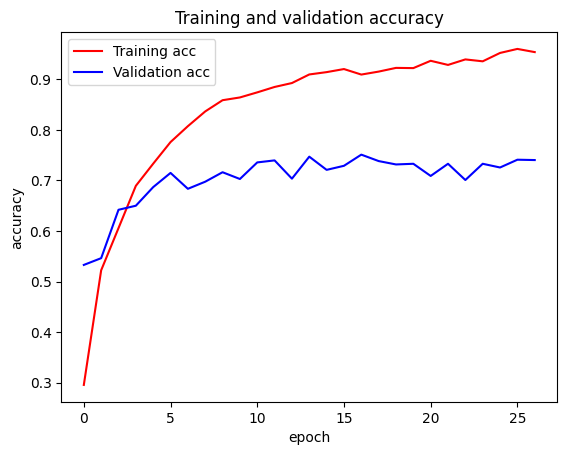

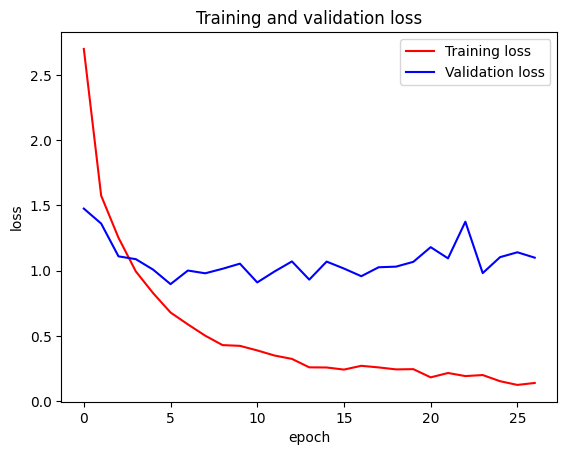

In [59]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [60]:
model.evaluate(test_data, test_labels)

33/33 [==============================] - 0s 5ms/step - loss: 1.0540 - acc: 0.7558


[1.0540248155593872, 0.755836546421051]

In [61]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0)
print('rounded test_labels', preds)

test data [[[[7.04503059e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.45529878e-01 0.00000000e+00]
   [7.92095959e-02 0.00000000e+00 8.96495581e-01 ... 0.00000000e+00
    3.05549651e-01 0.00000000e+00]
   [1.21236980e-01 0.00000000e+00 1.28944802e+00 ... 2.29827344e-01
    3.46317172e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.49128032e-01 0.00000000e+00]
   [3.46537083e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.06187105e-01 0.00000000e+00]
   [1.43855006e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.33832300e-01 0.00000000e+00]]

  [[1.85366452e-01 0.00000000e+00 3.98448646e-01 ... 0.00000000e+00
    6.63891256e-01 0.00000000e+00]
   [3.13503027e-01 0.00000000e+00 1.40785038e+00 ... 2.89690852e-01
    2.66882271e-01 0.00000000e+00]
   [4.42054331e-01 0.00000000e+00 1.92171478e+00 ... 8.28756750e-01
    5.11367977e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 4.81179655e-0

33/33 [==============================] - 0s 5ms/step
rounded test_labels [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [62]:
animals = ['African_Elephant','Amur_Leopard','Arctic_Fox','Chimpanzee','Jaguars','Lion','Orangutan','Panda','Panthers','Rhino','cheetahs',
           'Himalyan_Bear','Goat','Leopard','Changtang']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

                  precision    recall  f1-score   support

African_Elephant       0.96      0.49      0.65        95
    Amur_Leopard       0.91      0.75      0.82       122
      Arctic_Fox       0.82      0.68      0.74        81
      Chimpanzee       0.50      0.14      0.22        21
         Jaguars       0.88      0.49      0.63        78
            Lion       0.86      0.38      0.52        16
       Orangutan       0.89      0.50      0.64        16
           Panda       0.77      0.86      0.81        73
        Panthers       0.55      0.38      0.44        16
           Rhino       0.70      0.87      0.78        95
        cheetahs       0.84      0.86      0.85       136
   Himalyan_Bear       0.78      0.94      0.85        70
            Goat       0.73      0.87      0.80        54
         Leopard       0.68      0.90      0.77       117
       Changtang       0.65      0.82      0.72        38

       micro avg       0.78      0.75      0.76      1028
       macro

c:\Users\Siddhesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [64]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [65]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


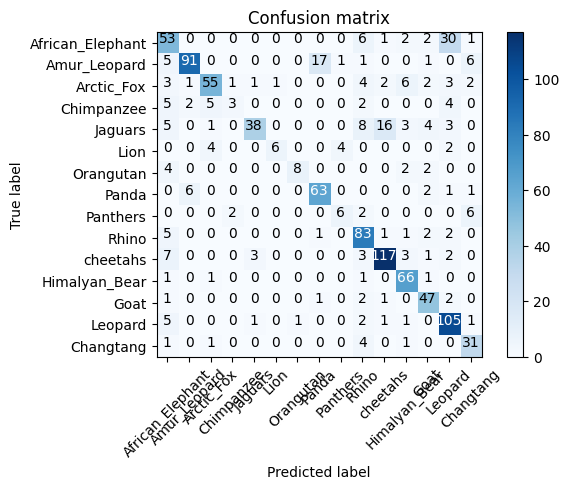

In [66]:
plot_confusion_matrix(confusion_matrix, ['African_Elephant','Amur_Leopard','Arctic_Fox','Chimpanzee','Jaguars','Lion','Orangutan','Panda','Panthers','Rhino','cheetahs',
           'Himalyan_Bear','Goat','Leopard','Changtang'])

Normalized confusion matrix


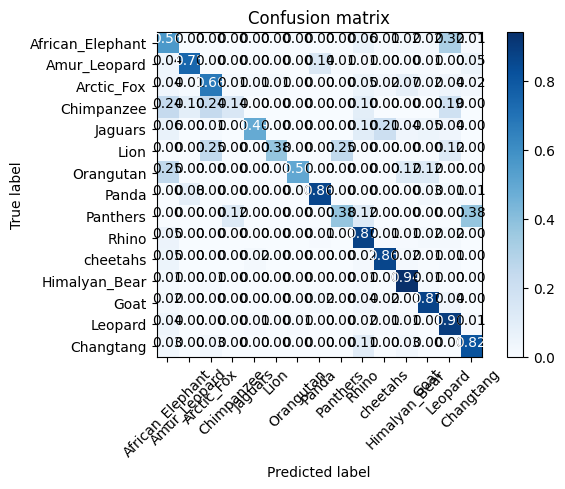

In [67]:
plot_confusion_matrix(confusion_matrix,
                      ['African_Elephant','Amur_Leopard','Arctic_Fox','Chimpanzee','Jaguars','Lion','Orangutan','Panda','Panthers','Rhino','cheetahs',
           'Himalyan_Bear','Goat','Leopard','Changtang'],
                     normalize=True)

In [68]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image

In [69]:
def test_single_image(path):
    animals = ['African_Elephant','Amur_Leopard','Arctic_Fox','Chimpanzee','Jaguars','Lion','Orangutan','Panda','Panthers','Rhino','cheetahs','Himalyan_Bear','Goat','Leopard','Changtang']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)
    
    predict_prob=model.predict([bt_prediction])
    predict_classes=np.argmax(predict_prob,axis=1)
    for idx, animal, x in zip(range(0,16), animals , predict_prob[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)

    class_predicted=model.predict([bt_prediction])
    class_predicted=np.argmax(class_predicted,axis=1)
    class_dictionary = generator_top.class_indices
    inv_map = {v: k for k, v in class_dictionary.items()}
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))
    return load_img(path)

In [70]:
path = "Data/Test/Arctic_Fox/367.jpg"

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 50ms/step
ID: 0, Label: African_Elephant 0.0%
ID: 1, Label: Amur_Leopard 0.0%
ID: 2, Label: Arctic_Fox 100.0%
ID: 3, Label: Chimpanzee 0.0%
ID: 4, Label: Jaguars 0.0%
ID: 5, Label: Lion 0.0%
ID: 6, Label: Orangutan 0.0%
ID: 7, Label: Panda 0.0%
ID: 8, Label: Panthers 0.0%
ID: 9, Label: Rhino 0.0%
ID: 10, Label: cheetahs 0.0%
ID: 11, Label: Himalyan_Bear 0.0%
ID: 12, Label: Goat 0.0%
ID: 13, Label: Leopard 0.0%
ID: 14, Label: Changtang 0.0%
Final Decision:
.
..
...
1/1 [==============================] - 0s 17ms/step
ID: 2, Label: Arctic_Fox


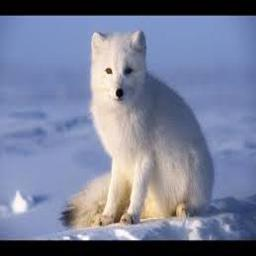

In [71]:
test_single_image(path)

In [72]:
import pickle
pickle_out = open("Endanager_animal.pkl","wb")
pickle.dump(to_categorical, pickle_out)
pickle_out.close()

In [73]:
model.save("endanger.h5")

c:\Users\Siddhesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
from keras.models import load_model 
loaded_model = load_model("endanger.h5") 

In [75]:
pip install -U ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
pip install -q streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
pip install pyngrok

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
%%writefile animal.py

import streamlit as st
import pickle
import numpy as np
import pandas as pd
import itertools
import keras
from sklearn import metrics, model_selection
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import datetime
import time
import os
import random
import shutil
import glob
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.applications.resnet50 import preprocess_input

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
# Load your pre-trained CNN model
model = tf.keras.models.load_model('endanger.h5')
img_width, img_height = 224, 224
train_data_dir = "Data\Train"
batch_size = 50
datagen = ImageDataGenerator(rescale=1. / 255)
generator_top = datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)
# Define a function for image classification
def read_image(img):
    print("[INFO] loading and preprocessing image...")
    image = load_img(image, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image
    # img = np.array(image).astype('float32') / 255.0
    # img = tf.image.resize(img, (224, 224))
    # img = np.expand_dims(img, axis=0)
    # predictions = model.predict(img)
    # return predictions
def test_single_image(image):
    animals = ['African_Elephant','Amur_Leopard','Arctic_Fox','Chimpanzee','Jaguars','Lion','Orangutan','Panda','Panthers','Rhino','cheetahs','Himalyan_Bear','Goat','Leopard','Changtang']
    image = read_image(image)
    time.sleep(.5)
    bt_prediction = vgg16.predict(image)
    
    predict_prob=model.predict([bt_prediction])
    predict_classes=np.argmax(predict_prob,axis=1)
    for idx, animal, x in zip(range(0,16), animals , predict_prob[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)

    class_predicted=model.predict([bt_prediction])
    class_predicted=np.argmax(class_predicted,axis=1)
    class_dictionary = generator_top.class_indices
    inv_map = {v: k for k, v in class_dictionary.items()}
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))
    return load_img(image)
# Create a Streamlit app
st.title("Image Classification App")
st.write("Upload an image to classify")

uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
if uploaded_image is not None:
    image = Image.open(uploaded_image)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    st.write("")
    
    if st.button("Classify"):
        predictions = read_image(image)
        predictions1 = test_single_image(image)
        st.write("Prediction Results:")
        st.write(predictions1)




Overwriting animal.py
